$\Huge \mathrm{Preprocessing + feature\ engineering + data\  splitting}$
MDS7201

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def getdata():
    df = pd.read_pickle("data/features_small.pickle")
    df = df.reset_index()
    df["fname"] = df.name + "_" + df.fid.astype(str)
    df = df.pivot(index="oid", columns=["fname"], values="value")
    labels = pd.read_pickle("data/dfcrossmatches_small.pickle")
    labels = labels.loc[labels.index.isin(df.index)].classALeRCE
    return df, labels

In [10]:
df, labels = getdata()

In [11]:
df.shape

(39024, 179)

In [12]:
df.shape

(39024, 179)

In [13]:
labels.shape

(39024,)

# Preprocessing

There are several preprocessing steps that can be applied to the data. So far we have seen the first two below, but there are many possible transformations:

* Missing data
    - imputation: impute missing variables
    - indicator variable: whether data is/was missing
* Scaling and transforming:
    - subtract the mean and divide by the standard deviation
    - log transform to reduce skewness
* Encoding categorical variables:
    - One hot encoding: encode categories into binary sequence
    - Label encoding: encode categories into integers
* Binning / bucketing
    - numeric binning: convert numeric values into categorical values
    - quantile binning: divide data into quantiles
* Aggregation
    - statistical summaries: aggregate data to compute statistics
    - window functions: sliding window statistics
* Feature interactions
    - cross features: combination of one or more features
* Date and time features
    - decomposition: minute, day, year, etc
    - time since event: time since given event happened
    - cyclic transformation: if time is cyclic, transform time into 2D circle
* Image features
    - Hu moments: translation, rotation, scaling invariant statistics
    - Bounding boxes: object detection
* Time series
    - time series statistics
    - Units, e.g. flux vs magnitude
* Text data features:
    - Bag of words (frequency)
    - TF-IDF: weighting based on inverse document frequency
    - Word embeddings: encode text as vectors
* Other data types
    - spectra: log wavelength and flux derivative
    - 3D point clouds: local cloud statistics, voxel downsampling

## Missing data

### Imputation

In [64]:
df, labels = getdata()

In [65]:
df.head()

fname,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_non_det_before_fid_1,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2,r-W2_0,r-W3_0,rb_0,sgscore1_0
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aaaabrg,0.242504,0.232499,1.0,1.000000,1.0,1.0,0.426471,0.361446,0.0,0.000000,...,0.0,0.0,18.0,29.0,0.264706,0.349398,NaN,NaN,0.891429,0.979470
ZTF17aaaabtj,0.294114,0.216206,1.0,1.000000,1.0,1.0,0.489510,0.390909,0.0,0.009259,...,0.0,1.0,54.0,11.0,0.377622,0.100000,NaN,NaN,0.864286,0.989226
ZTF17aaaacml,0.179008,0.162632,1.0,1.000000,1.0,1.0,0.403846,0.229508,0.0,0.000000,...,0.0,2.0,16.0,47.0,0.307692,0.770492,NaN,NaN,0.855714,0.998750
ZTF17aaaacnc,0.199403,0.215955,1.0,0.999978,1.0,1.0,0.062500,0.350000,0.0,0.000000,...,5.0,3.0,1.0,5.0,0.062500,0.125000,NaN,NaN,0.764286,0.997083
ZTF17aaaacnt,0.671062,0.498549,1.0,0.775576,1.0,1.0,0.242105,0.298246,0.0,0.000000,...,1.0,1.0,54.0,73.0,0.568421,0.640351,NaN,NaN,0.745714,0.995625


In [66]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
dfi = imp.transform(df)
dfi = pd.DataFrame(data=dfi, columns=df.columns, index=df.index)
dfi.head()

fname,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_non_det_before_fid_1,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2,r-W2_0,r-W3_0,rb_0,sgscore1_0
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aaaabrg,0.242504,0.232499,1.0,1.000000,1.0,1.0,0.426471,0.361446,0.0,0.000000,...,0.0,0.0,18.0,29.0,0.264706,0.349398,4.645677,7.501856,0.891429,0.979470
ZTF17aaaabtj,0.294114,0.216206,1.0,1.000000,1.0,1.0,0.489510,0.390909,0.0,0.009259,...,0.0,1.0,54.0,11.0,0.377622,0.100000,4.645677,7.501856,0.864286,0.989226
ZTF17aaaacml,0.179008,0.162632,1.0,1.000000,1.0,1.0,0.403846,0.229508,0.0,0.000000,...,0.0,2.0,16.0,47.0,0.307692,0.770492,4.645677,7.501856,0.855714,0.998750
ZTF17aaaacnc,0.199403,0.215955,1.0,0.999978,1.0,1.0,0.062500,0.350000,0.0,0.000000,...,5.0,3.0,1.0,5.0,0.062500,0.125000,4.645677,7.501856,0.764286,0.997083
ZTF17aaaacnt,0.671062,0.498549,1.0,0.775576,1.0,1.0,0.242105,0.298246,0.0,0.000000,...,1.0,1.0,54.0,73.0,0.568421,0.640351,4.645677,7.501856,0.745714,0.995625


### Indicator variable

In [75]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        dfi[f"{col}_imputed"] = pd.Series(df[col].isna(), dtype=int)

In [79]:
cols = set(np.array(list(zip(df.columns, [f"{col}_imputed" if f"{col}_imputed" in dfi.columns else "" for col in df.columns]))).flatten())
cols.remove("")
cols

{'Amplitude_1',
 'Amplitude_1_imputed',
 'Amplitude_2',
 'Amplitude_2_imputed',
 'AndersonDarling_1',
 'AndersonDarling_1_imputed',
 'AndersonDarling_2',
 'AndersonDarling_2_imputed',
 'Autocor_length_1',
 'Autocor_length_1_imputed',
 'Autocor_length_2',
 'Autocor_length_2_imputed',
 'Beyond1Std_1',
 'Beyond1Std_1_imputed',
 'Beyond1Std_2',
 'Beyond1Std_2_imputed',
 'Con_1',
 'Con_1_imputed',
 'Con_2',
 'Con_2_imputed',
 'Eta_e_1',
 'Eta_e_1_imputed',
 'Eta_e_2',
 'Eta_e_2_imputed',
 'ExcessVar_1',
 'ExcessVar_1_imputed',
 'ExcessVar_2',
 'ExcessVar_2_imputed',
 'GP_DRW_sigma_1',
 'GP_DRW_sigma_1_imputed',
 'GP_DRW_sigma_2',
 'GP_DRW_sigma_2_imputed',
 'GP_DRW_tau_1',
 'GP_DRW_tau_1_imputed',
 'GP_DRW_tau_2',
 'GP_DRW_tau_2_imputed',
 'Gskew_1',
 'Gskew_1_imputed',
 'Gskew_2',
 'Gskew_2_imputed',
 'Harmonics_mag_1_1',
 'Harmonics_mag_1_1_imputed',
 'Harmonics_mag_1_2',
 'Harmonics_mag_1_2_imputed',
 'Harmonics_mag_2_1',
 'Harmonics_mag_2_1_imputed',
 'Harmonics_mag_2_2',
 'Harmonics_ma

In [86]:
dfi = dfi[sorted(list(cols))]
dfi.head()

fname,Amplitude_1,Amplitude_1_imputed,Amplitude_2,Amplitude_2_imputed,AndersonDarling_1,AndersonDarling_1_imputed,AndersonDarling_2,AndersonDarling_2_imputed,Autocor_length_1,Autocor_length_1_imputed,...,positive_fraction_1,positive_fraction_1_imputed,positive_fraction_2,positive_fraction_2_imputed,r-W2_0,r-W2_0_imputed,r-W3_0,r-W3_0_imputed,rb_0,sgscore1_0
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aaaabrg,0.242504,0,0.232499,0,1.0,0,1.000000,0,1.0,0,...,0.264706,0,0.349398,0,4.645677,1,7.501856,1,0.891429,0.979470
ZTF17aaaabtj,0.294114,0,0.216206,0,1.0,0,1.000000,0,1.0,0,...,0.377622,0,0.100000,0,4.645677,1,7.501856,1,0.864286,0.989226
ZTF17aaaacml,0.179008,0,0.162632,0,1.0,0,1.000000,0,1.0,0,...,0.307692,0,0.770492,0,4.645677,1,7.501856,1,0.855714,0.998750
ZTF17aaaacnc,0.199403,0,0.215955,0,1.0,0,0.999978,0,1.0,0,...,0.062500,0,0.125000,0,4.645677,1,7.501856,1,0.764286,0.997083
ZTF17aaaacnt,0.671062,0,0.498549,0,1.0,0,0.775576,0,1.0,0,...,0.568421,0,0.640351,0,4.645677,1,7.501856,1,0.745714,0.995625


In [186]:
dfi = dfi[list(df)]

## Scaling and transforming

### Standard scaler

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dfi)
dfi_scaled = pd.DataFrame(data=scaler.transform(dfi), columns=dfi.columns, index=dfi.index)

In [188]:
dfi.describe()

fname,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_non_det_before_fid_1,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2,r-W2_0,r-W3_0,rb_0,sgscore1_0
count,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,...,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000,39024.000000
mean,0.507960,0.439811,0.898405,0.897152,2.519296,2.339586,0.331458,0.324749,0.001984,0.001789,...,4.906622,6.630407,27.323801,23.759174,0.468988,0.466946,4.635885,7.393779,0.816277,0.874455
std,0.448493,0.392288,0.205490,0.206479,3.709762,3.598077,0.098576,0.091073,0.009071,0.008620,...,12.650569,12.158739,38.469795,36.113408,0.350773,0.355111,0.754509,0.908411,0.085225,0.233493
min,0.006390,0.006185,0.108049,0.101729,1.000000,1.000000,0.000000,0.021277,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.193442,0.429442,0.561429,0.000000
25%,0.208159,0.196819,0.937205,0.934180,1.000000,1.000000,0.272727,0.273292,0.000000,0.000000,...,0.000000,1.000000,3.000000,2.000000,0.158730,0.133333,4.645677,7.501856,0.752857,0.919264
50%,0.402083,0.341036,0.999934,0.999747,1.000000,1.000000,0.329268,0.325000,0.000000,0.000000,...,1.000000,3.000000,14.000000,12.000000,0.437500,0.441860,4.645677,7.501856,0.826905,0.988125
75%,0.657436,0.527021,1.000000,1.000000,2.000000,2.000000,0.386953,0.375000,0.000000,0.000000,...,5.000000,8.000000,36.000000,30.000000,0.763910,0.774194,4.645677,7.501856,0.889286,0.998000
max,3.920869,3.667311,1.000000,1.000000,98.000000,66.000000,0.738318,0.770833,0.127273,0.130435,...,414.000000,357.000000,651.000000,642.000000,1.000000,1.000000,15.322982,15.676599,0.977143,1.000000


In [189]:
dfi_scaled.describe()

fname,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_non_det_before_fid_1,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2,r-W2_0,r-W3_0,rb_0,sgscore1_0
count,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,...,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04,3.902400e+04
mean,-1.845919e-15,-3.714533e-15,-2.723632e-13,8.551176e-13,2.199031e-14,-6.286106e-15,3.909451e-13,-5.573007e-13,-4.489595e-14,1.631166e-14,...,-1.776132e-14,-1.060025e-14,1.327262e-14,-1.745527e-14,-4.496949e-15,1.032211e-14,3.574481e-12,-2.329786e-12,-1.674208e-15,4.911920e-15
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.118360e+00,-1.105392e+00,-3.846243e+00,-3.852366e+00,-4.095453e-01,-3.723109e-01,-3.362496e+00,-3.332216e+00,-2.186970e-01,-2.075659e-01,...,-3.878627e-01,-5.453273e-01,-7.102754e-01,-6.579129e-01,-1.337032e+00,-1.314945e+00,-5.887934e+00,-7.666606e+00,-2.990322e+00,-3.745146e+00
25%,-6.684724e-01,-6.194305e-01,1.888209e-01,1.793305e-01,-4.095453e-01,-3.723109e-01,-5.957940e-01,-5.650136e-01,-2.186970e-01,-2.075659e-01,...,-3.878627e-01,-4.630809e-01,-6.322912e-01,-6.025311e-01,-8.845104e-01,-9.394715e-01,1.297751e-02,1.189756e-01,-7.441493e-01,1.919079e-01
50%,-2.360763e-01,-2.517964e-01,4.940912e-01,4.968839e-01,-4.095453e-01,-3.723109e-01,-2.220946e-02,2.756312e-03,-2.186970e-01,-2.075659e-01,...,-3.088139e-01,-2.985880e-01,-3.463489e-01,-3.256221e-01,-8.976979e-02,-7.064256e-02,1.297751e-02,1.189756e-01,1.247073e-01,4.868305e-01
75%,3.332897e-01,2.223121e-01,4.944106e-01,4.981076e-01,-1.399827e-01,-9.438105e-02,5.629749e-01,5.517710e-01,-2.186970e-01,-2.075659e-01,...,7.381457e-03,1.126441e-01,2.255357e-01,1.728141e-01,8.407888e-01,8.652252e-01,1.297751e-02,1.189756e-01,8.566676e-01,5.291235e-01
max,7.609831e+00,8.227469e+00,4.944106e-01,4.981076e-01,2.573802e+01,1.769313e+01,4.127423e+00,4.898137e+00,1.381242e+01,1.492493e+01,...,3.233836e+01,2.881665e+01,1.621231e+01,1.711965e+01,1.513853e+00,1.501108e+00,1.416448e+01,9.118043e+00,1.887560e+00,5.376890e-01


/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


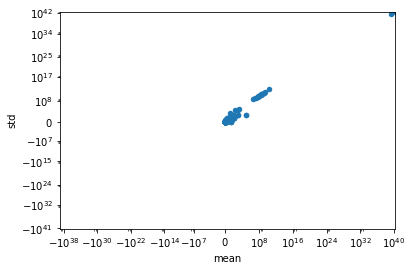

In [190]:
fig, ax = plt.subplots()
dfi.describe().loc[["mean", "std"]].transpose().plot.scatter(x='mean', y='std', ax=ax)
ax.set_xscale('asinh')
ax.set_yscale('asinh')

/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


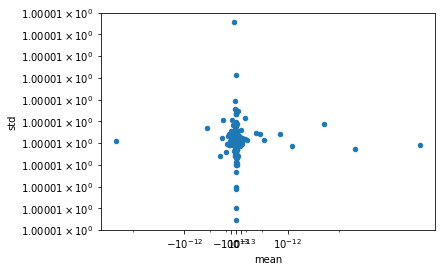

In [191]:
fig, ax = plt.subplots()
dfi_scaled.describe().loc[["mean", "std"]].transpose().plot.scatter(x='mean', y='std', ax=ax)
ax.set_xscale('asinh')
ax.set_yscale('asinh')

### Reduce skewness

In [192]:
from sklearn.preprocessing import PowerTransformer

In [193]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [194]:
power.fit(dfi_scaled)

PowerTransformer()

In [292]:
df_pt = pd.DataFrame(data=power.transform(dfi_scaled), columns=dfi.columns, index=dfi.index)

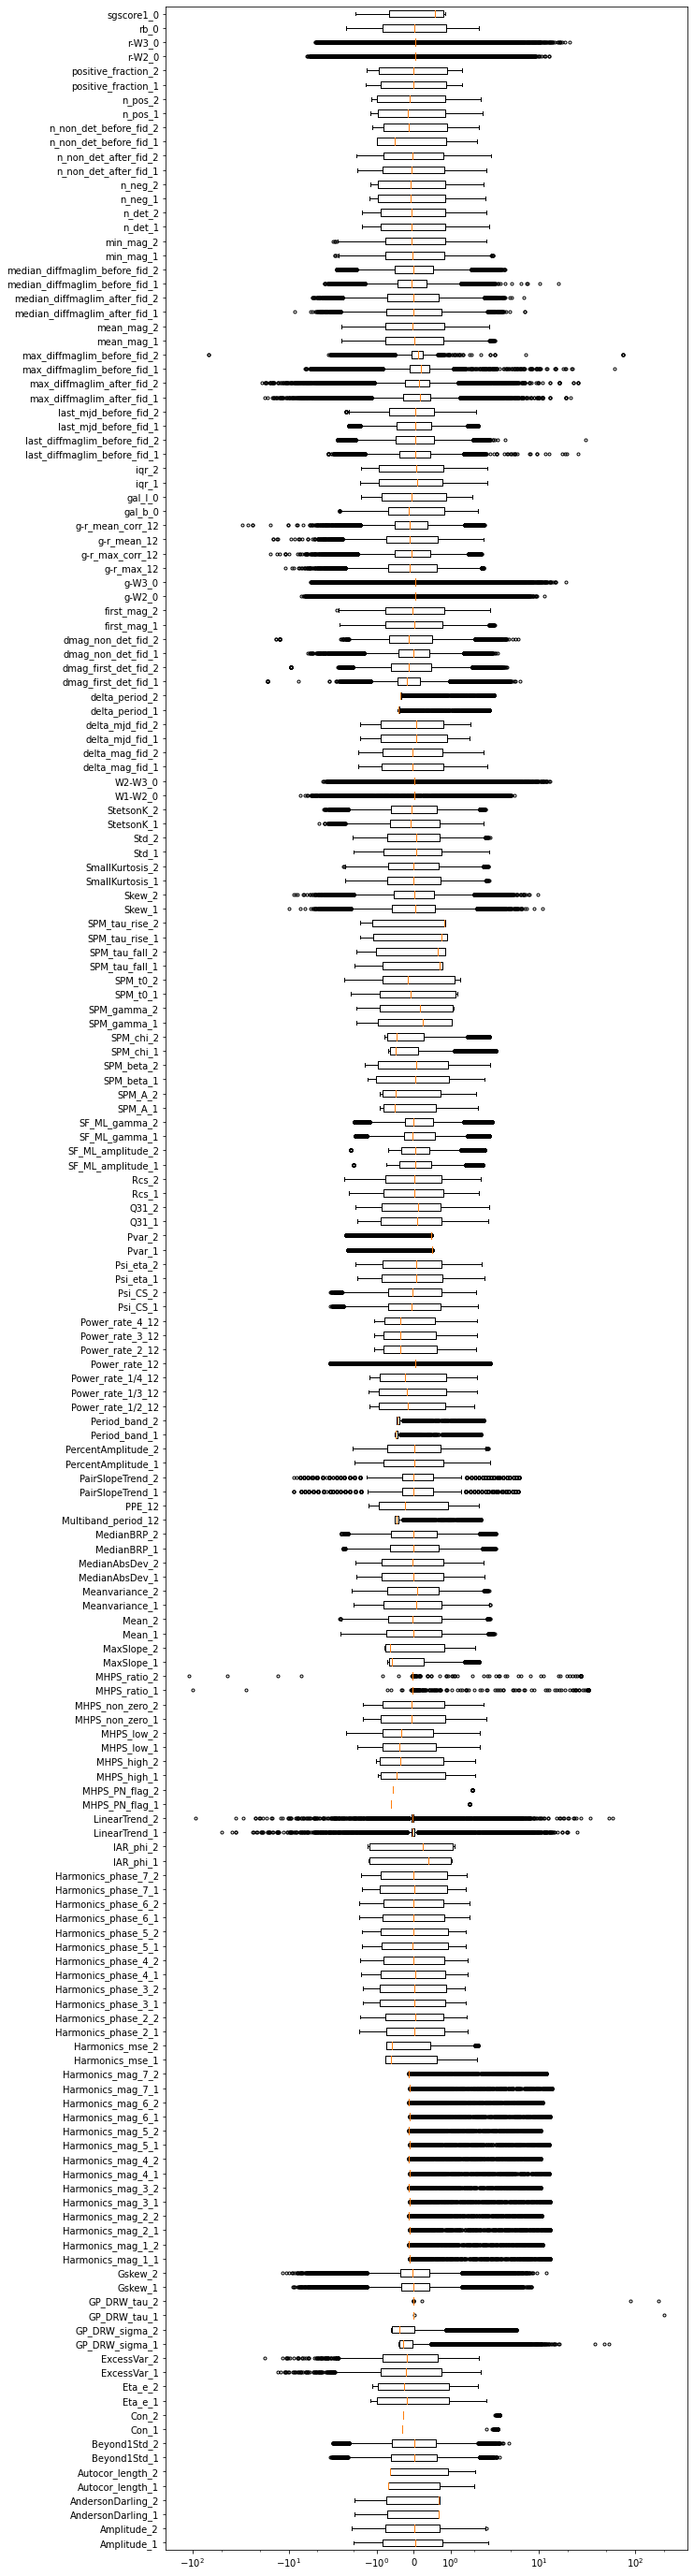

In [196]:
fig, ax = plt.subplots(figsize=(10, 50))
ax.boxplot(df_pt.fillna(df_pt.median(axis=0)), vert=False, labels=list(df_pt), flierprops={'marker':'.'})
ax.set_xscale('asinh', linthresh=0.1)

## Encoding categorial variables

### One hot encoding

In [197]:
labels

oid
ZTF18aaveffj      LPV
ZTF19aauyvnv      LPV
ZTF18ablqvvc      RRL
ZTF18acbvvku      AGN
ZTF18acefhus      QSO
                ...  
ZTF19aarauin      RRL
ZTF18aawgtde      QSO
ZTF19adcftsl      QSO
ZTF17aaaeblo      LPV
ZTF17aaawcpz    EB/EW
Name: classALeRCE, Length: 39024, dtype: object

In [198]:
labels.unique().shape

(22,)

In [199]:
pd.get_dummies(labels)

,AGN,Blazar,CV/Nova,Ceph,DSCT,EA,EB/EW,LPV,NLAGN,NLQSO,...,RRL,RSCVn,SLSN,SNII,SNIIb,SNIIn,SNIa,SNIbc,TDE,YSO
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aaveffj,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ZTF19aauyvnv,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ZTF18ablqvvc,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ZTF18acbvvku,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZTF18acefhus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF19aarauin,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ZTF18aawgtde,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZTF19adcftsl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Label encoding

In [200]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# force classes and order
classes = ['SNIbc', 'SNII', 'SNIIn', 'SNIIb', 'SNIa', 'SLSN', 'TDE',
       'CV/Nova', 'AGN', 'QSO', 'Blazar', 'YSO', 
       'DSCT', 'RRL','EB/EW', 'EA', 'Ceph', 'LPV', 'RSCVn', 'Periodic-Other']
labels = labels.loc[labels.isin(classes)]
le.fit(classes)
# force given order
le.classes_ = np.array(classes)
y = le.transform(labels)

In [201]:
list(zip(labels, y))

[('LPV', 17),
 ('LPV', 17),
 ('RRL', 13),
 ('AGN', 8),
 ('QSO', 9),
 ('LPV', 17),
 ('RRL', 13),
 ('QSO', 9),
 ('EB/EW', 14),
 ('YSO', 11),
 ('RRL', 13),
 ('EB/EW', 14),
 ('RRL', 13),
 ('LPV', 17),
 ('EB/EW', 14),
 ('LPV', 17),
 ('LPV', 17),
 ('LPV', 17),
 ('RRL', 13),
 ('QSO', 9),
 ('LPV', 17),
 ('QSO', 9),
 ('EA', 15),
 ('EB/EW', 14),
 ('QSO', 9),
 ('LPV', 17),
 ('EB/EW', 14),
 ('QSO', 9),
 ('RRL', 13),
 ('EB/EW', 14),
 ('EB/EW', 14),
 ('QSO', 9),
 ('LPV', 17),
 ('RRL', 13),
 ('QSO', 9),
 ('QSO', 9),
 ('LPV', 17),
 ('EB/EW', 14),
 ('QSO', 9),
 ('YSO', 11),
 ('RRL', 13),
 ('EB/EW', 14),
 ('QSO', 9),
 ('QSO', 9),
 ('LPV', 17),
 ('EB/EW', 14),
 ('LPV', 17),
 ('QSO', 9),
 ('LPV', 17),
 ('RRL', 13),
 ('QSO', 9),
 ('QSO', 9),
 ('RRL', 13),
 ('YSO', 11),
 ('AGN', 8),
 ('Blazar', 10),
 ('EB/EW', 14),
 ('QSO', 9),
 ('LPV', 17),
 ('RRL', 13),
 ('RRL', 13),
 ('EB/EW', 14),
 ('AGN', 8),
 ('RRL', 13),
 ('EA', 15),
 ('QSO', 9),
 ('RSCVn', 18),
 ('EB/EW', 14),
 ('EB/EW', 14),
 ('YSO', 11),
 ('LPV', 

## Binning / bucketing

### Quantile binning

In [202]:
df.Mean_1

oid
ZTF17aaaabrg    17.419468
ZTF17aaaabtj    16.286298
ZTF17aaaacml    17.287847
ZTF17aaaacnc    17.866244
ZTF17aaaacnt    17.475464
                  ...    
ZTF21abkjyui    15.230367
ZTF21abkndcw    16.615808
ZTF21abknlix    16.594997
ZTF21abkrimu          NaN
ZTF21abkylyc          NaN
Name: Mean_1, Length: 39024, dtype: float64

<Axes: ylabel='Frequency'>

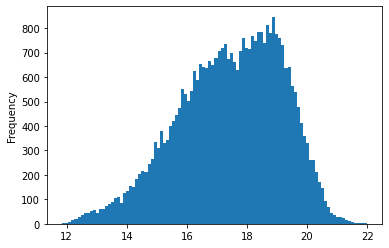

In [203]:
df.Mean_1.plot.hist(bins=100)

In [204]:
aux = pd.qcut(df.Mean_1, q=5, labels=False)
aux

oid
ZTF17aaaabrg    2.0
ZTF17aaaabtj    1.0
ZTF17aaaacml    2.0
ZTF17aaaacnc    2.0
ZTF17aaaacnt    2.0
               ... 
ZTF21abkjyui    0.0
ZTF21abkndcw    1.0
ZTF21abknlix    1.0
ZTF21abkrimu    NaN
ZTF21abkylyc    NaN
Name: Mean_1, Length: 39024, dtype: float64

In [205]:
aux

oid
ZTF17aaaabrg    2.0
ZTF17aaaabtj    1.0
ZTF17aaaacml    2.0
ZTF17aaaacnc    2.0
ZTF17aaaacnt    2.0
               ... 
ZTF21abkjyui    0.0
ZTF21abkndcw    1.0
ZTF21abknlix    1.0
ZTF21abkrimu    NaN
ZTF21abkylyc    NaN
Name: Mean_1, Length: 39024, dtype: float64

<Axes: >

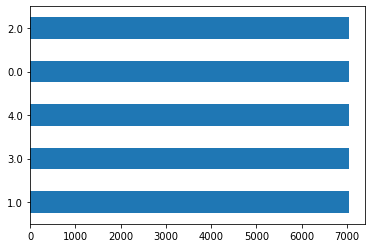

In [206]:
aux.value_counts().plot.barh()

### Numeric binning

In [207]:
cats, bins = pd.qcut(df.Mean_1, q=5, retbins=True)

In [208]:
cats

oid
ZTF17aaaabrg                 (17.09, 18.108]
ZTF17aaaabtj                 (15.934, 17.09]
ZTF17aaaacml                 (17.09, 18.108]
ZTF17aaaacnc                 (17.09, 18.108]
ZTF17aaaacnt                 (17.09, 18.108]
                            ...             
ZTF21abkjyui    (11.854000000000001, 15.934]
ZTF21abkndcw                 (15.934, 17.09]
ZTF21abknlix                 (15.934, 17.09]
ZTF21abkrimu                             NaN
ZTF21abkylyc                             NaN
Name: Mean_1, Length: 39024, dtype: category
Categories (5, interval[float64, right]): [(11.854000000000001, 15.934] < (15.934, 17.09] < (17.09, 18.108] < (18.108, 19.022] < (19.022, 21.984]]

In [209]:
bins

array([11.85527722, 15.93417657, 17.09044451, 18.10764468, 19.02236004,
       21.98388786])

In [210]:
cats.apply(lambda x: x.mid)

/home/fforster/anaconda3/lib/python3.8/site-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


oid
ZTF17aaaabrg    17.599
ZTF17aaaabtj    16.512
ZTF17aaaacml    17.599
ZTF17aaaacnc    17.599
ZTF17aaaacnt    17.599
                 ...  
ZTF21abkjyui    13.894
ZTF21abkndcw    16.512
ZTF21abknlix    16.512
ZTF21abkrimu       NaN
ZTF21abkylyc       NaN
Name: Mean_1, Length: 39024, dtype: category
Categories (5, float64): [13.894 < 16.512 < 17.599 < 18.565 < 20.503]

## Aggregation

###  Statistical summaries

Imagine that we want to group samples by certain column, e.g. the mean magnitude.

In [211]:
cats = pd.qcut(df.Mean_1, q=500, labels=False)

In [212]:
df["cat"] = cats

In [213]:
aux = df.groupby('cat').apply(lambda df: df.mean())
aux

fname,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2,r-W2_0,r-W3_0,rb_0,sgscore1_0,cat
cat,,,,,,,,,,,,,,,,,,,,,
0.0,0.277939,0.757630,0.956726,0.763788,1.507042,1.333333,0.318111,0.341503,0.001441,0.000000,...,75.500000,18.126761,13.500000,0.684545,0.580270,0.986675,0.966008,0.606543,0.661539,0.0
1.0,0.287581,0.172545,0.968282,0.996990,1.414286,1.000000,0.335888,0.330960,0.000872,0.000000,...,4.900000,21.314286,13.100000,0.529632,0.535754,0.932015,0.715515,0.626878,0.732533,1.0
2.0,0.338312,0.237621,0.965372,0.995381,1.732394,1.076923,0.341551,0.287419,0.001211,0.000000,...,11.250000,21.239437,11.125000,0.495490,0.501206,1.178091,1.103891,0.641898,0.710040,2.0
3.0,0.262418,0.220985,0.959323,0.954006,1.557143,1.090909,0.330377,0.371695,0.000692,0.000000,...,10.115385,13.771429,11.000000,0.402737,0.443765,1.261326,1.298184,0.648401,0.797140,3.0
4.0,0.341571,0.225462,0.947303,0.992496,1.718310,1.043478,0.333586,0.317283,0.000733,0.000000,...,6.821429,19.183099,14.285714,0.461049,0.546022,1.292288,1.321788,0.650584,0.779593,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495.0,0.400033,0.458819,0.678914,0.759004,1.718310,2.948276,0.317732,0.300652,0.001132,0.002415,...,6.173913,2.605634,7.028986,0.124383,0.145656,5.717286,8.640286,0.831435,0.828983,495.0
496.0,0.418831,0.421907,0.704445,0.702665,2.271429,3.551724,0.319296,0.304934,0.001186,0.003986,...,6.130435,3.114286,10.652174,0.148109,0.163356,5.710582,8.727685,0.834905,0.874885,496.0
497.0,0.501818,0.573529,0.732974,0.797462,1.915493,3.596491,0.314933,0.323614,0.001855,0.005538,...,5.910448,2.253521,11.417910,0.102136,0.127234,5.432508,8.474842,0.830168,0.816163,497.0


Let's compare it with a variable that should be similar, Mean_2

<Axes: xlabel='cat'>

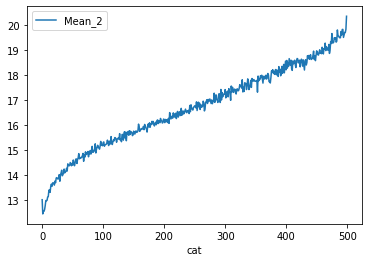

In [214]:
aux.plot(x="cat", y="Mean_2")

### Window function

Imagine that we want to smooth the values along the new axis, taking a rolling mean filter of 5 bins

In [215]:
aux2 = aux.rolling(5).apply(lambda df: df.mean())

<Axes: xlabel='cat'>

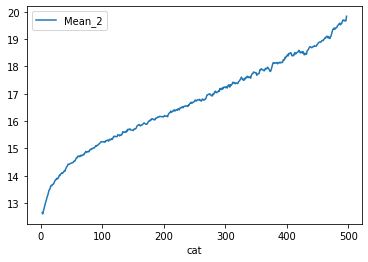

In [216]:
aux2.plot(x="cat", y="Mean_2")

## Feature interactions

### Cross features

We will find clusters among the variables and then we will add the projection into the first principal component of each cluster as a new column.

We will compute the correlation matrix to decide what cross features to use.

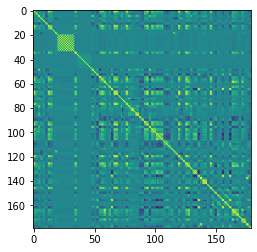

In [293]:
cm = df_pt.corr() # if you use cov the covariance will not be normalized, try that as well
plt.imshow(cm)

In [294]:
distance_matrix = 1 - cm.abs()

In [295]:
import scipy.cluster.hierarchy as sch

In [296]:
linkage_matrix = sch.linkage(sch.distance.squareform(distance_matrix), method='complete')

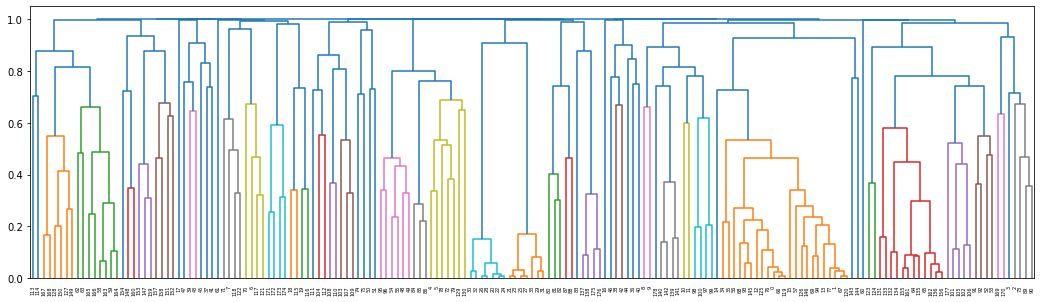

In [297]:
# Reorder the correlation matrix according to the clustering
fig, ax = plt.subplots(figsize=(18, 5))
dendro = sch.dendrogram(linkage_matrix, ax=ax)
index = dendro['leaves']
sorted_correlation_matrix = cm.iloc[index, :].iloc[:, index]

Get clusters based on dendrogram colors

In [298]:
clusters = {}
idx = 0
clusters[idx] = [dendro['leaves'][idx]]
for i in range(len(dendro['leaves']) - 1):
    if dendro['leaves_color_list'][i] == dendro['leaves_color_list'][i+1]:
        clusters[idx].append(dendro['leaves'][i+1])
    else:
        idx += 1
        clusters[idx] = [dendro['leaves'][i+1]]

In [299]:
clusters

{0: [113, 114],
 1: [167, 168, 128, 150, 127, 149],
 2: [62, 63, 165, 166, 58, 163, 59, 164],
 3: [154],
 4: [148, 160],
 5: [153, 147, 159],
 6: [157, 158, 151, 152],
 7: [17, 47],
 8: [39, 43],
 9: [45, 37, 41, 61],
 10: [71, 7, 118, 122],
 11: [70, 6, 117, 121],
 12: [171, 172, 173, 174],
 13: [18, 115],
 14: [19, 116],
 15: [111],
 16: [104, 112],
 17: [108, 110],
 18: [103, 107, 109],
 19: [74, 75, 50, 51],
 20: [95, 96, 54, 55, 48, 49],
 21: [84, 85, 86],
 22: [4, 5, 78, 72, 79, 129, 130],
 23: [30, 32, 26, 28, 20, 22, 24],
 24: [21, 23, 25, 27, 33, 29, 31],
 25: [80, 81, 82],
 26: [87, 88],
 27: [83],
 28: [137, 138, 175, 176],
 29: [16, 46],
 30: [38, 42],
 31: [44, 36, 40],
 32: [8, 9],
 33: [178],
 34: [140, 142, 139, 141],
 35: [10, 11],
 36: [98, 100, 97, 99],
 37: [14],
 38: [34,
  35,
  56,
  68,
  93,
  145,
  12,
  125,
  76,
  0,
  66,
  119,
  15,
  57,
  126,
  146,
  69,
  94,
  13,
  77,
  1,
  67,
  120],
 39: [143, 144, 60],
 40: [123, 124],
 41: [131, 133, 132, 

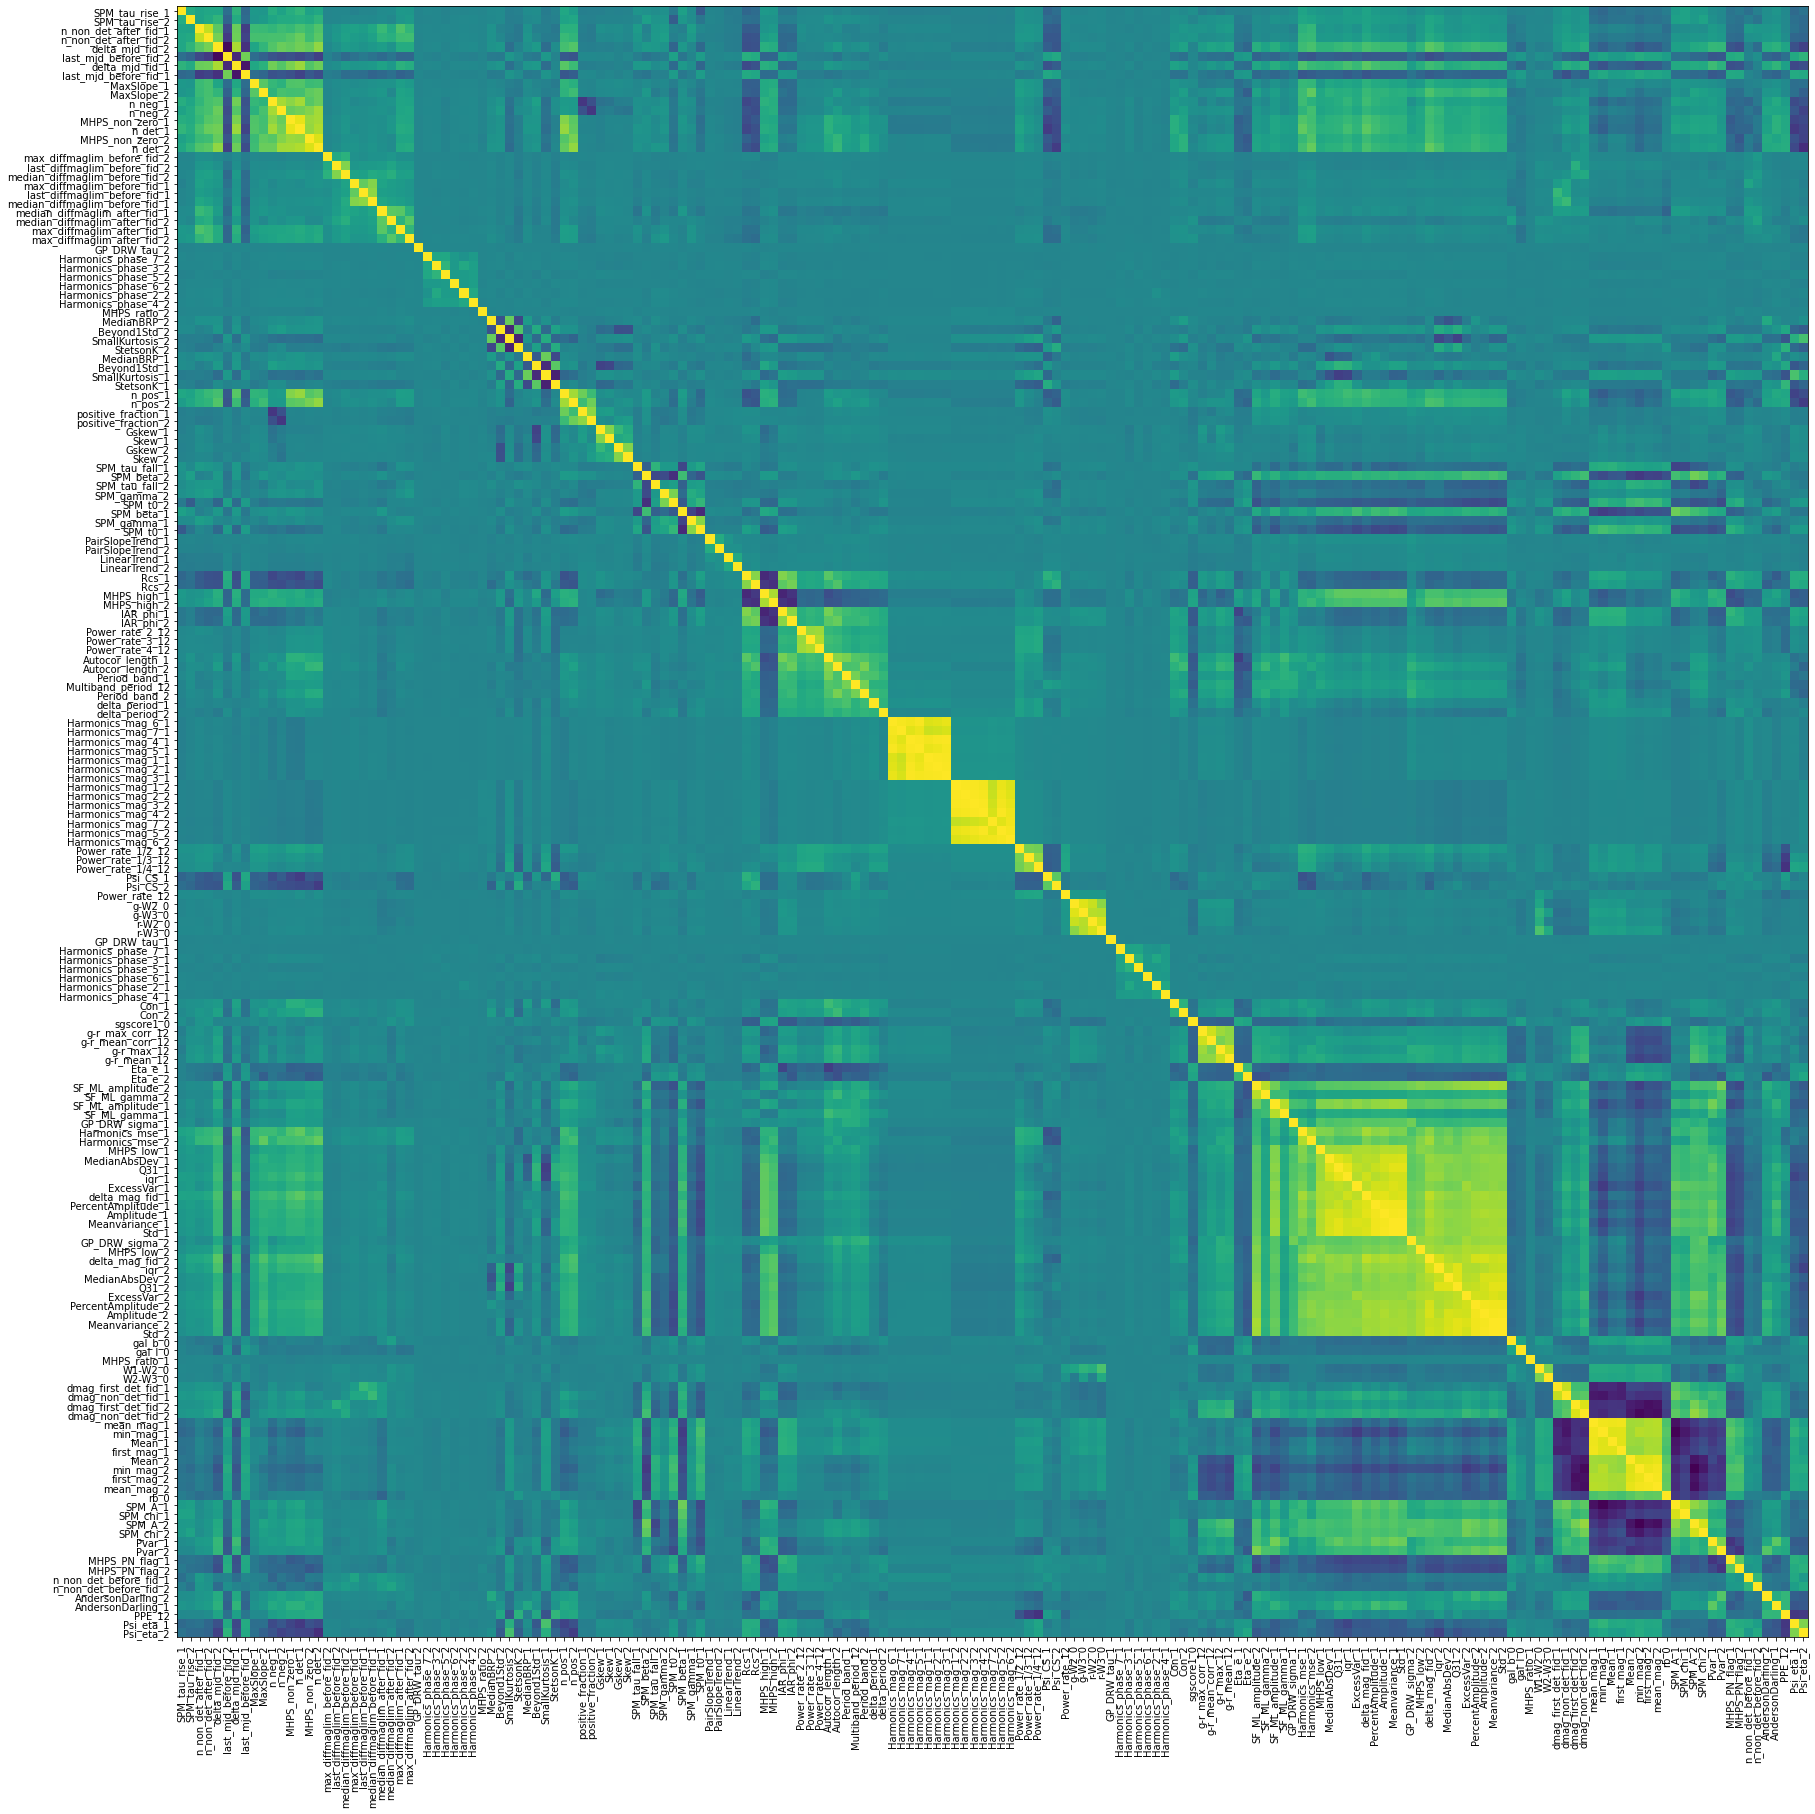

In [300]:
# Visualize the sorted correlation matrix
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(sorted_correlation_matrix)
ax.set_yticks(range(df_pt.shape[1]))
ax.set_yticklabels(np.array(list(df_pt))[index]);
ax.set_xticks(range(df_pt.shape[1]))
ax.set_xticklabels(np.array(list(df_pt))[index], rotation=90);

Now we will compute features based on the principal components of each cluster

In [305]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)

df_pt_pca = df_pt.iloc[:, index].copy()

for idxc in range(len(clusters)):
    aux = df_pt[df_pt.columns[clusters[idxc]]]
    pca.fit(aux)
    proj = pca.transform(aux)
    proj
    df_pt_pca[idxc] = proj

In [306]:
df_pt_pca

fname,SPM_tau_rise_1,SPM_tau_rise_2,n_non_det_after_fid_1,n_non_det_after_fid_2,delta_mjd_fid_2,last_mjd_before_fid_2,delta_mjd_fid_1,last_mjd_before_fid_1,MaxSlope_1,MaxSlope_2,...,37,38,39,40,41,42,43,44,45,46
oid,,,,,,,,,,,,,,,,,,,,,
ZTF17aaaabrg,0.493906,0.818278,1.074760,0.537500,0.253694,0.036617,0.300320,0.039527,-0.354388,1.195535,...,-0.315905,-1.867564,-0.050680,0.019441,-0.381277,-1.471052,-0.982858,-1.547311,-0.646246,-2.818551
ZTF17aaaabtj,0.867751,0.818278,0.686119,1.295562,0.596821,-0.562890,0.440348,0.039527,0.113011,1.427146,...,-0.254782,-2.085244,0.592660,0.019441,-1.256648,-0.883111,-0.982858,-1.267375,-0.646246,-2.877799
ZTF17aaaacml,0.374820,-0.890555,1.028718,0.553688,0.192460,-0.518443,0.388584,0.039527,-0.628759,-0.422160,...,-0.329863,-3.737212,0.009702,0.019441,-0.100018,-1.426376,-0.982858,-1.020197,-0.646246,-2.544391
ZTF17aaaacnc,-1.220747,0.818278,1.118404,0.600788,0.286708,-0.626100,-0.137720,-0.370337,-0.674217,-0.753158,...,-0.294604,-4.258276,-0.030732,0.019441,-0.091666,-0.960456,0.163102,0.508701,-0.645629,0.271958
ZTF17aaaacnt,0.323937,0.818278,1.159858,1.124697,0.560157,-0.506420,0.510827,-1.242928,2.080490,1.867340,...,-0.126185,2.947449,0.532060,0.019441,0.791438,0.264983,-0.982858,-0.893890,1.631823,-0.070712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF21abkjyui,-1.606709,0.783232,-1.582723,-0.037183,0.062298,0.036617,-1.656746,0.039527,-0.621973,-0.611453,...,0.070495,1.342930,-0.424162,0.019441,-1.534223,0.814967,-0.982858,-0.803558,-0.639109,0.847122
ZTF21abkndcw,-1.564412,-1.627534,-1.687711,-1.591213,-1.621701,0.036617,-1.648549,0.039527,-0.469721,-0.611453,...,-0.002369,0.764207,-1.277195,-3.903817,-1.347631,0.204993,-0.982858,-1.547311,-0.639109,0.711506
ZTF21abknlix,-1.363013,-1.504041,-1.634919,-1.717132,-1.635016,2.069447,-1.645789,0.039527,0.663155,-0.754739,...,-0.360701,-5.905606,1.290553,-4.070821,-3.039776,-0.251974,0.163489,-1.020197,1.904257,1.707412


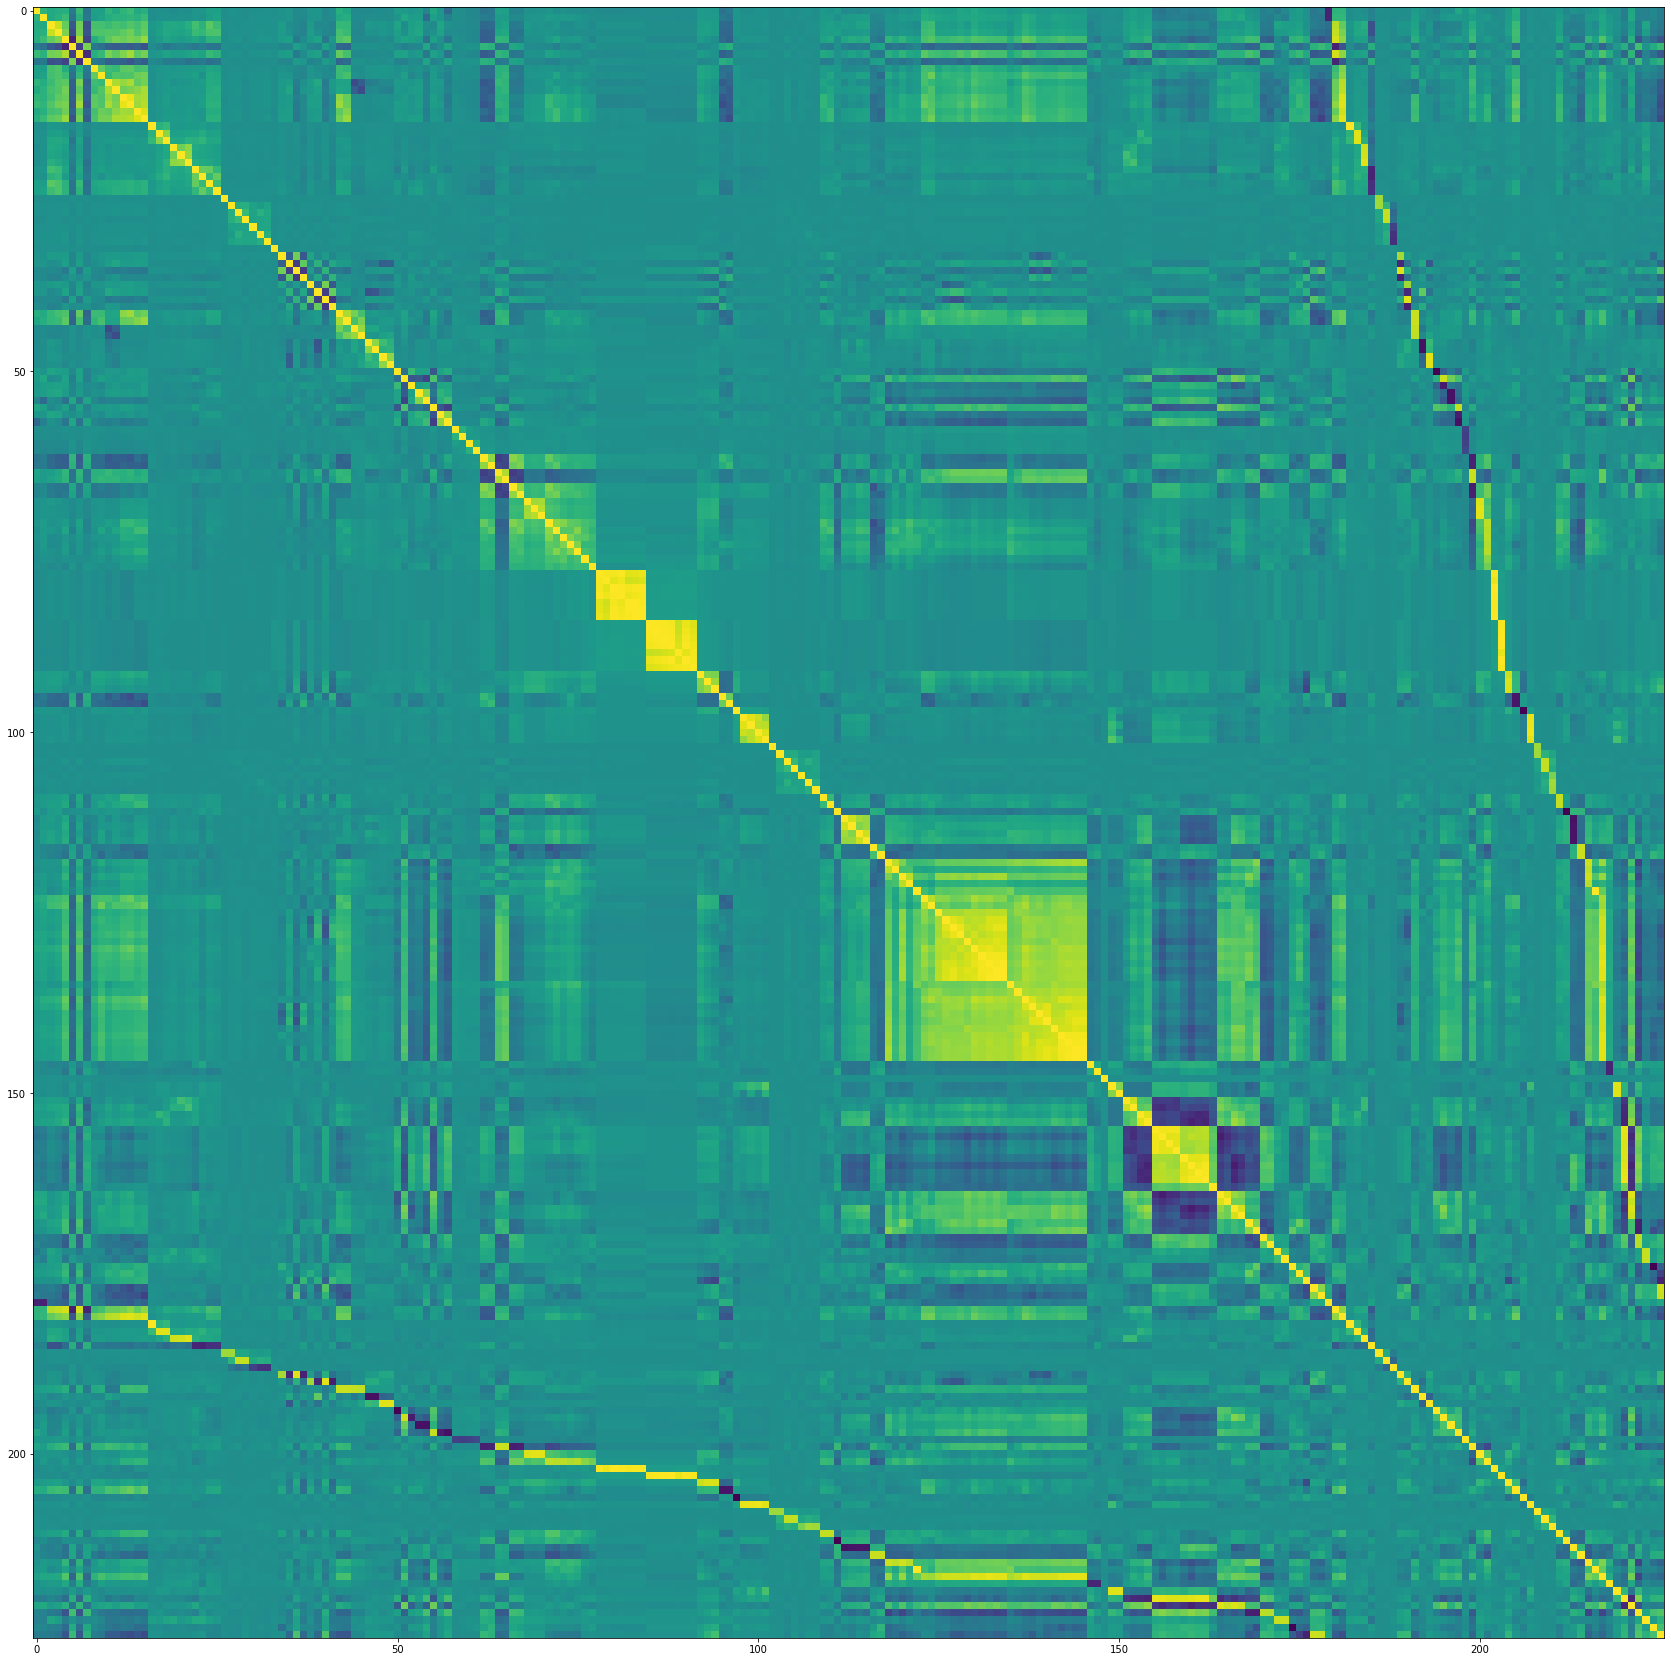

In [308]:
fig, ax = plt.subplots(figsize=(30, 30))
cm = df_pt_pca.corr() # if you use cov the covariance will not be normalized, try that as well
plt.imshow(cm)

Note that the new columns are correlated with the columns from the corresponding cluster. Also note that the new columns (bottom right) have very little correlation between them.

## Date and time features

### Decomposition

In [327]:
ts = pd.DataFrame(index=pd.date_range(start='20220330', periods=10000, freq='1min'), data=range(10000), columns=["val"])

In [328]:
ts

,val
2022-03-30 00:00:00,0
2022-03-30 00:01:00,1
2022-03-30 00:02:00,2
2022-03-30 00:03:00,3
2022-03-30 00:04:00,4
...,...
2022-04-05 22:35:00,9995
2022-04-05 22:36:00,9996
2022-04-05 22:37:00,9997
2022-04-05 22:38:00,9998


In [329]:
ts.index.day

Int64Index([30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
            ...
             5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
           dtype='int64', length=10000)

In [330]:
ts.index.hour

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            22, 22, 22, 22, 22, 22, 22, 22, 22, 22],
           dtype='int64', length=10000)

In [331]:
ts.index.weekday

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=10000)

In [332]:
ts.index.second

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=10000)

<Axes: >

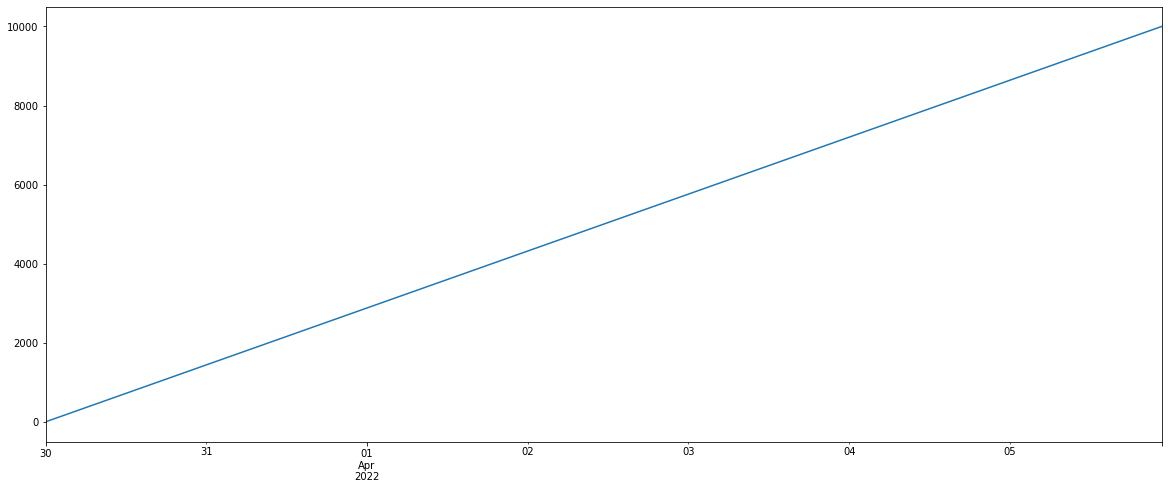

In [333]:
fig, ax = plt.subplots(figsize=(20, 8))
ts.val.plot(ax=ax)

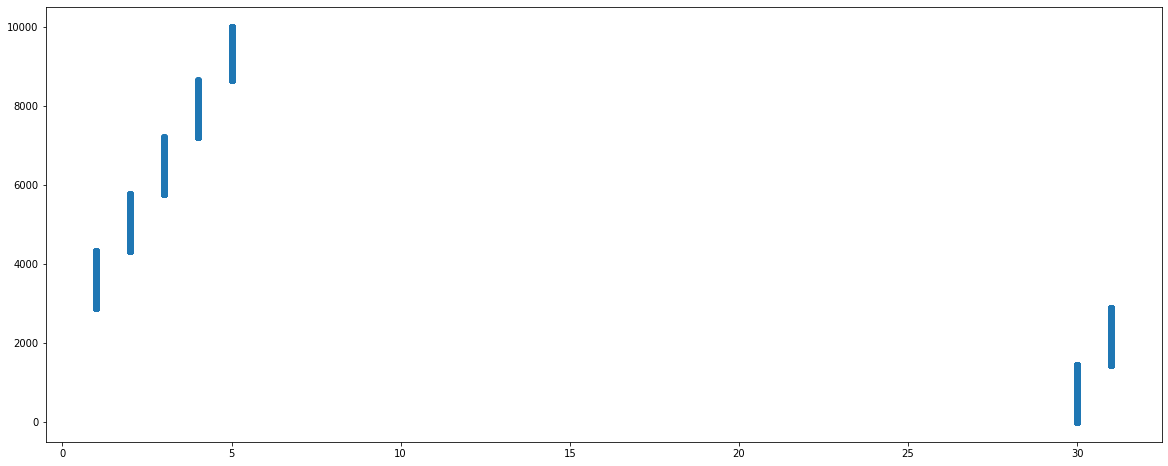

In [334]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(ts.index.day, ts.val)

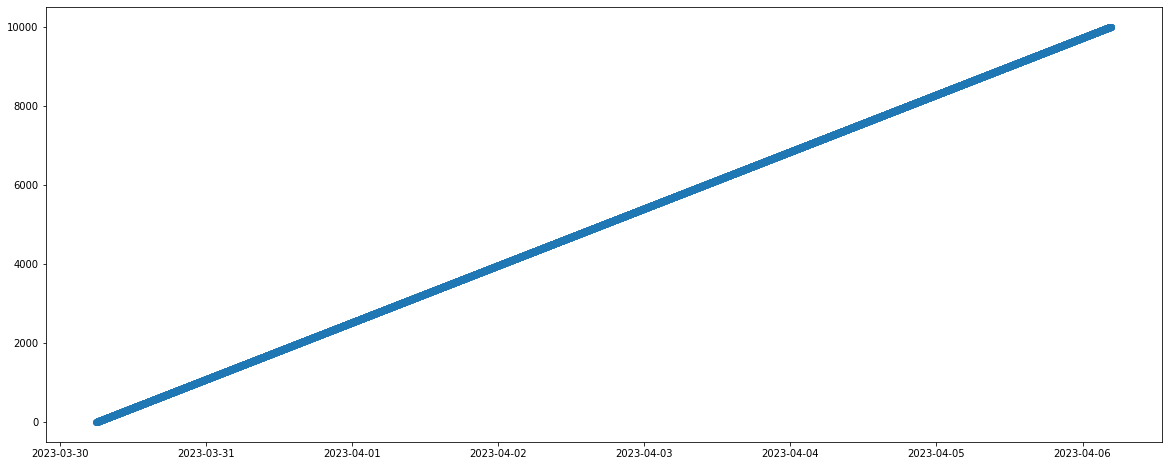

In [335]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(ts.index + pd.Timedelta(365.25, unit="days"), ts.val)

### Time since event

In [336]:
ts

,val
2022-03-30 00:00:00,0
2022-03-30 00:01:00,1
2022-03-30 00:02:00,2
2022-03-30 00:03:00,3
2022-03-30 00:04:00,4
...,...
2022-04-05 22:35:00,9995
2022-04-05 22:36:00,9996
2022-04-05 22:37:00,9997
2022-04-05 22:38:00,9998


In [337]:
ts.index = ts.index - pd.to_datetime('2024-01-01 12:00:00')

In [338]:
ts

,val
-643 days +12:00:00,0
-643 days +12:01:00,1
-643 days +12:02:00,2
-643 days +12:03:00,3
-643 days +12:04:00,4
...,...
-636 days +10:35:00,9995
-636 days +10:36:00,9996
-636 days +10:37:00,9997
-636 days +10:38:00,9998


### Cyclic transformation

In [341]:
ts = pd.DataFrame(index=pd.date_range(start='20220330', periods=10000, freq='1min'), data=range(10000), columns=["val"])

Sometimes it may be convenient to add a variable that encodes the periodicity of the data in a continuous fashion, e.g. taking sin and cos of the hour of the day to represent time.

In [342]:
dt = ts.index.hour + (ts.index.minute + ts.index.second / 60.) / 60.

In [343]:
ts["sint"] = np.sin(dt * np.pi / 12.)
ts["cost"] = np.cos(dt * np.pi / 12.)

In [344]:
ts

,val,sint,cost
2022-03-30 00:00:00,0,0.000000,1.000000
2022-03-30 00:01:00,1,0.004363,0.999990
2022-03-30 00:02:00,2,0.008727,0.999962
2022-03-30 00:03:00,3,0.013090,0.999914
2022-03-30 00:04:00,4,0.017452,0.999848
...,...,...,...
2022-04-05 22:35:00,9995,-0.362438,0.932008
2022-04-05 22:36:00,9996,-0.358368,0.933580
2022-04-05 22:37:00,9997,-0.354291,0.935135
2022-04-05 22:38:00,9998,-0.350207,0.936672


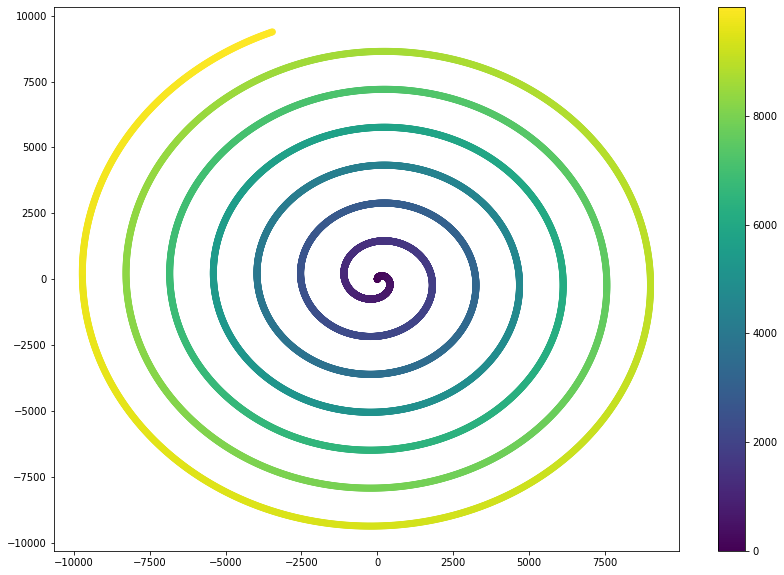

In [345]:
fig, ax = plt.subplots(figsize=(14, 10))
cax=ax.scatter(ts.val * ts.sint, ts.val * ts.cost, c=ts.val)
fig.colorbar(cax)

## Image features

### Hu moments

### Bounding boxes

## Time series

### Statistics

https://tsfresh.readthedocs.io/en/latest/text/quick_start.html

In [346]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

Normal behavior

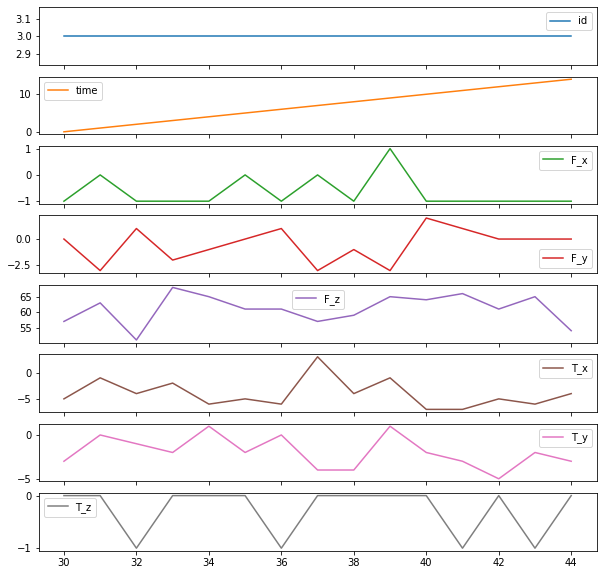

In [348]:
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

Failure

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

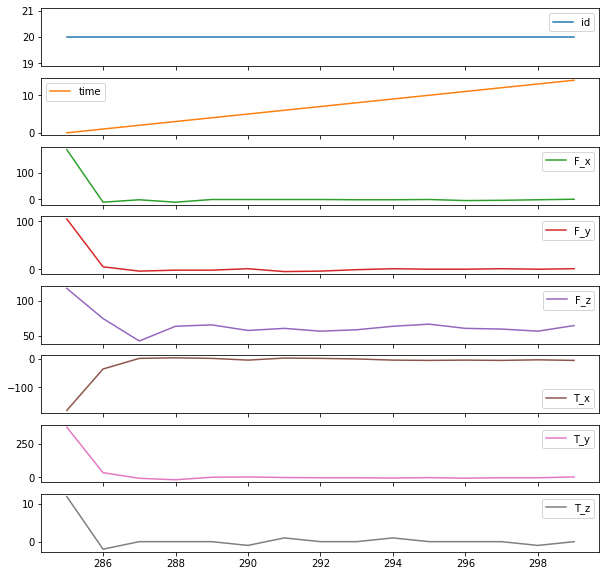

In [349]:
timeseries[timeseries['id'] == 20].plot(subplots=True, sharex=True, figsize=(10,10))

In [350]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 20/20 [00:03<00:00,  5.96it/s]


In [354]:
extract_features

<function tsfresh.feature_extraction.extraction.extract_features(timeseries_container, default_fc_parameters=None, kind_to_fc_parameters=None, column_id=None, column_sort=None, column_kind=None, column_value=None, chunksize=None, n_jobs=4, show_warnings=False, disable_progressbar=False, impute_function=None, profile=False, profiling_filename='profile.txt', profiling_sorting='cumulative', distributor=None, pivot=True)>

In [351]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

/home/fforster/anaconda3/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn(


In [353]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 20/20 [00:03<00:00,  5.36it/s]


## Text

### Bag of words (frequency)

https://ayselaydin.medium.com/4-bag-of-words-model-in-nlp-434cb38cdd1b

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/fforster/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fforster/nltk_data...


True

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer 
import re
from nltk.corpus import stopwords

def preprocessing_text(text):
    lemmatizer = WordNetLemmatizer()
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'
    
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)  
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)
    text= text.lower().strip()
    
    return text

paragraph = """I am really disappointed this product. I would not use it again. It has really bad feature.
I love this product! It has some good features"""

sentences_list = nltk.sent_tokenize(paragraph)
 
corpus = [preprocessing_text(sentence) for sentence in sentences_list]

print(corpus)

['i really disappointed product', 'i would use again', 'it really bad feature', 'i love product', 'it good feature']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()

X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)

Unique Word List: 
 ['again' 'bad' 'disappointed' 'feature' 'good' 'it' 'love' 'product'
 'really' 'use' 'would']
Bag of Words Matrix: 
 [[0 0 1 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0]]


In [16]:
df = pd.DataFrame(data=X_array, columns=feature_names, index=corpus)

df

,again,bad,disappointed,feature,good,it,love,product,really,use,would
i really disappointed product,0,0,1,0,0,0,0,1,1,0,0
i would use again,1,0,0,0,0,0,0,0,0,1,1
it really bad feature,0,1,0,1,0,1,0,0,1,0,0
i love product,0,0,0,0,0,0,1,1,0,0,0
it good feature,0,0,0,1,1,1,0,0,0,0,0


### TF-IDF

Term Frequency - Inverse Document Frequency

Term Frequency (TF) is how often a word appears in a document, divided by how many words there are.

$\rm \Huge TF(t) = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the document}$

Inverse Document Frequency (IDF) is how unique or rare a word is:

$\rm \Huge IDF(t) = \ln \frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t\ in\ it}$

See https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3

In [75]:
import math
from nltk import sent_tokenize, word_tokenize, PorterStemmer

In [76]:
text = """
Those Who Are Resilient Stay In The Game Longer
“On the mountains of truth you can never climb in vain: either you will reach a point higher up today, or you will be training your powers so that you will be able to climb higher tomorrow.” — Friedrich Nietzsche
Challenges and setbacks are not meant to defeat you, but promote you. However, I realise after many years of defeats, it can crush your spirit and it is easier to give up than risk further setbacks and disappointments. Have you experienced this before? To be honest, I don’t have the answers. I can’t tell you what the right course of action is; only you will know. However, it’s important not to be discouraged by failure when pursuing a goal or a dream, since failure itself means different things to different people. To a person with a Fixed Mindset failure is a blow to their self-esteem, yet to a person with a Growth Mindset, it’s an opportunity to improve and find new ways to overcome their obstacles. Same failure, yet different responses. Who is right and who is wrong? Neither. Each person has a different mindset that decides their outcome. Those who are resilient stay in the game longer and draw on their inner means to succeed.

I’ve coached many clients who gave up after many years toiling away at their respective goal or dream. It was at that point their biggest breakthrough came. Perhaps all those years of perseverance finally paid off. It was the 19th Century’s minister Henry Ward Beecher who once said: “One’s best success comes after their greatest disappointments.” No one knows what the future holds, so your only guide is whether you can endure repeated defeats and disappointments and still pursue your dream. Consider the advice from the American academic and psychologist Angela Duckworth who writes in Grit: The Power of Passion and Perseverance: “Many of us, it seems, quit what we start far too early and far too often. Even more than the effort a gritty person puts in on a single day, what matters is that they wake up the next day, and the next, ready to get on that treadmill and keep going.”

I know one thing for certain: don’t settle for less than what you’re capable of, but strive for something bigger. Some of you reading this might identify with this message because it resonates with you on a deeper level. For others, at the end of their tether the message might be nothing more than a trivial pep talk. What I wish to convey irrespective of where you are in your journey is: NEVER settle for less. If you settle for less, you will receive less than you deserve and convince yourself you are justified to receive it.

“Two people on a precipice over Yosemite Valley” by Nathan Shipps on Unsplash
Develop A Powerful Vision Of What You Want
“Your problem is to bridge the gap which exists between where you are now and the goal you intend to reach.” — Earl Nightingale
I recall a passage my father often used growing up in 1990s: “Don’t tell me your problems unless you’ve spent weeks trying to solve them yourself.” That advice has echoed in my mind for decades and became my motivator. Don’t leave it to other people or outside circumstances to motivate you because you will be let down every time. It must come from within you. Gnaw away at your problems until you solve them or find a solution. Problems are not stop signs, they are advising you that more work is required to overcome them. Most times, problems help you gain a skill or develop the resources to succeed later. So embrace your challenges and develop the grit to push past them instead of retreat in resignation. Where are you settling in your life right now? Could you be you playing for bigger stakes than you are? Are you willing to play bigger even if it means repeated failures and setbacks? You should ask yourself these questions to decide whether you’re willing to put yourself on the line or settle for less. And that’s fine if you’re content to receive less, as long as you’re not regretful later.

If you have not achieved the success you deserve and are considering giving up, will you regret it in a few years or decades from now? Only you can answer that, but you should carve out time to discover your motivation for pursuing your goals. It’s a fact, if you don’t know what you want you’ll get what life hands you and it may not be in your best interest, affirms author Larry Weidel: “Winners know that if you don’t figure out what you want, you’ll get whatever life hands you.” The key is to develop a powerful vision of what you want and hold that image in your mind. Nurture it daily and give it life by taking purposeful action towards it.

Vision + desire + dedication + patience + daily action leads to astonishing success. Are you willing to commit to this way of life or jump ship at the first sign of failure? I’m amused when I read questions written by millennials on Quora who ask how they can become rich and famous or the next Elon Musk. Success is a fickle and long game with highs and lows. Similarly, there are no assurances even if you’re an overnight sensation, to sustain it for long, particularly if you don’t have the mental and emotional means to endure it. This means you must rely on the one true constant in your favour: your personal development. The more you grow, the more you gain in terms of financial resources, status, success — simple. If you leave it to outside conditions to dictate your circumstances, you are rolling the dice on your future.

So become intentional on what you want out of life. Commit to it. Nurture your dreams. Focus on your development and if you want to give up, know what’s involved before you take the plunge. Because I assure you, someone out there right now is working harder than you, reading more books, sleeping less and sacrificing all they have to realise their dreams and it may contest with yours. Don’t leave your dreams to chance.
"""

In [77]:
sentences = sent_tokenize(text) # NLTK function
total_documents = len(sentences)

In [78]:
total_documents

52

In [79]:
sentences

['\nThose Who Are Resilient Stay In The Game Longer\n“On the mountains of truth you can never climb in vain: either you will reach a point higher up today, or you will be training your powers so that you will be able to climb higher tomorrow.”\u200a—\u200aFriedrich Nietzsche\nChallenges and setbacks are not meant to defeat you, but promote you.',
 'However, I realise after many years of defeats, it can crush your spirit and it is easier to give up than risk further setbacks and disappointments.',
 'Have you experienced this before?',
 'To be honest, I don’t have the answers.',
 'I can’t tell you what the right course of action is; only you will know.',
 'However, it’s important not to be discouraged by failure when pursuing a goal or a dream, since failure itself means different things to different people.',
 'To a person with a Fixed Mindset failure is a blow to their self-esteem, yet to a person with a Growth Mindset, it’s an opportunity to improve and find new ways to overcome their

In [83]:
def create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [80]:
def create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [81]:
def create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [82]:
def create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [84]:
def create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [85]:
def score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

In [86]:
def find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

In [89]:
def generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [90]:
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords    
    

# 1 Sentence Tokenize
sentences = sent_tokenize(text)
total_documents = len(sentences)
#print(sentences)

# 2 Create the Frequency matrix of the words in each sentence.
freq_matrix = create_frequency_matrix(sentences)
#print(freq_matrix)

'''
Term frequency (TF) is how often a word appears in a document, divided by how many words are there in a document.
'''
# 3 Calculate TermFrequency and generate a matrix
tf_matrix = create_tf_matrix(freq_matrix)
#print(tf_matrix)

# 4 creating table for documents per words
count_doc_per_words = create_documents_per_words(freq_matrix)
#print(count_doc_per_words)

'''
Inverse document frequency (IDF) is how unique or rare a word is.
'''
# 5 Calculate IDF and generate a matrix
idf_matrix = create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
#print(idf_matrix)

# 6 Calculate TF-IDF and generate a matrix
tf_idf_matrix = create_tf_idf_matrix(tf_matrix, idf_matrix)
#print(tf_idf_matrix)

# 7 Important Algorithm: score the sentences
sentence_scores = score_sentences(tf_idf_matrix)
#print(sentence_scores)

# 8 Find the threshold
threshold = find_average_score(sentence_scores)
#print(threshold)

# 9 Important Algorithm: Generate the summary
summary = generate_summary(sentences, sentence_scores, 1.3 * threshold)
print(summary)


 Have you experienced this before? Who is right and who is wrong? Neither. It was at that point their biggest breakthrough came. Perhaps all those years of perseverance finally paid off. It must come from within you. Where are you settling in your life right now? Could you be you playing for bigger stakes than you are? So become intentional on what you want out of life. Commit to it. Nurture your dreams.


### Word embeddings

![](images/word2vec.png)

![](images/word2vec_intro.png)

![](images/word2vec_formulae.png)

![](images/word2vec_king.png)

In [97]:
from gensim.models import word2vec, FastText

In [104]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [105]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

In [174]:
vector = model.wv['computer']# get numpy vector of a word
vector

array([-0.00515774, -0.00667028, -0.0077791 ,  0.00831315, -0.00198292,
       -0.00685696, -0.0041556 ,  0.00514562, -0.00286997, -0.00375075,
        0.0016219 , -0.0027771 , -0.00158482,  0.0010748 , -0.00297881,
        0.00852176,  0.00391207, -0.00996176,  0.00626142, -0.00675622,
        0.00076966,  0.00440552, -0.00510486, -0.00211128,  0.00809783,
       -0.00424503, -0.00763848,  0.00926061, -0.00215612, -0.00472081,
        0.00857329,  0.00428459,  0.0043261 ,  0.00928722, -0.00845554,
        0.00525685,  0.00203994,  0.0041895 ,  0.00169839,  0.00446543,
        0.0044876 ,  0.0061063 , -0.00320303, -0.00457706, -0.00042664,
        0.00253447, -0.00326412,  0.00605948,  0.00415534,  0.00776685,
        0.00257002,  0.00811905, -0.00138761,  0.00808028,  0.0037181 ,
       -0.00804967, -0.00393476, -0.0024726 ,  0.00489447, -0.00087241,
       -0.00283173,  0.00783599,  0.00932561, -0.0016154 , -0.00516075,
       -0.00470313, -0.00484746, -0.00960562,  0.00137242, -0.00

In [175]:
sims = model.wv.most_similar('computer', topn=10)  # get other similar words
sims

[('system', 0.21617139875888824),
 ('survey', 0.04468922317028046),
 ('interface', 0.015203381888568401),
 ('time', 0.0019510635174810886),
 ('trees', -0.03284316882491112),
 ('human', -0.07424270361661911),
 ('response', -0.09317591041326523),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513808578252792),
 ('user', -0.16911619901657104)]

# Splitting the data to avoid overfitting / data leakage

## Training, validation and test sets

A common strategy to fix overfitting is to split your data into training, validation and test sets. This allows for different models to be trained with the training set, using the validation set to choose the best model, and reporting metrics with the test set, which was not used to train your model and that only sees the final model.

## Cross-validation

Cross validation is a technique to use your training data more efficiently when creating a validation set. It is based on the idea of splitting your data many times, training a model and evaluating it to compute aggregate statistics to pick the best hyper parameters for your model.

There are many subtleties that need to taken into account to avoid data leakage:

1. If you are partitioning your data by index, make sure your data is shuffled at the start.

2. If your data is imbalanced, you need to make sure that all the classes are well represented in each partition (stratified)

3. If you have different sources of your data and you do not trust that all sources give you the same data, you may want to split your data so that different sources of data are not in the training and test sets simultaneously (grouped data).

4. Time series: in the case of time series, you cannot use the future to predict the past

5. Images: in the case of images, you cannot use data from the same image in the training and test sets, since images can be highly correlated.  

Note that 2 and 3 cannot be fixed simultaneaously in all cases.

Exceptions to 4 and 5 may apply. There is a correlation time scale or length scale for time series and images, respectively, beyond which you may mix data in the training and test sets.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

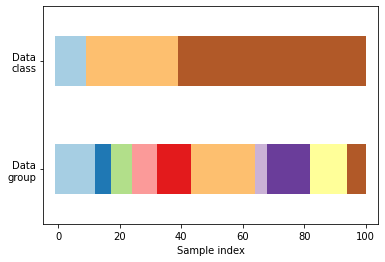

In [121]:
# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")

In [122]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

StratifiedKFold to preserve the percentage of samples for each class.

GroupKFold to ensure that the same group will not appear in two different folds.

StratifiedGroupKFold to keep the constraint of GroupKFold while attempting to return stratified folds.

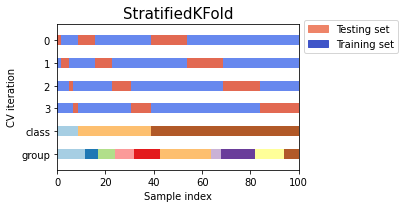

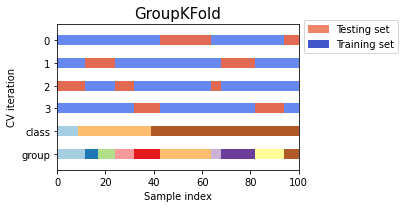

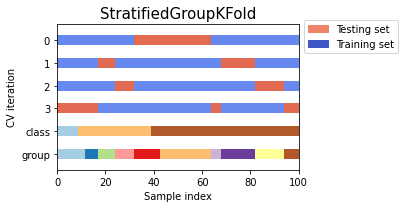

In [123]:
cvs = [StratifiedKFold, GroupKFold, StratifiedGroupKFold]

for cv in cvs:
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(cv(n_splits), X, y, groups, ax, n_splits)
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)

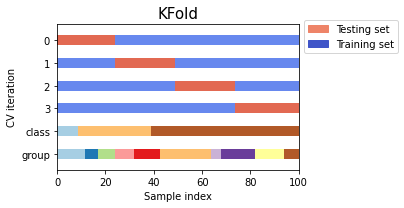

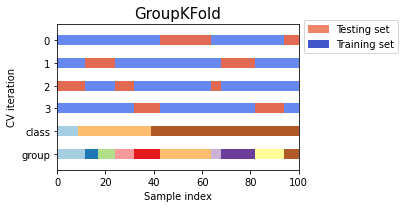

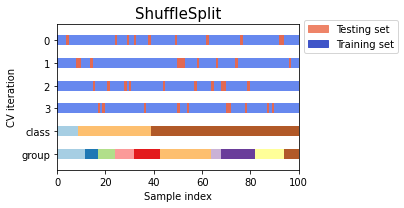

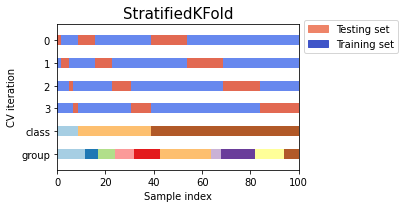

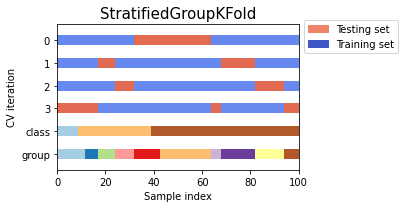

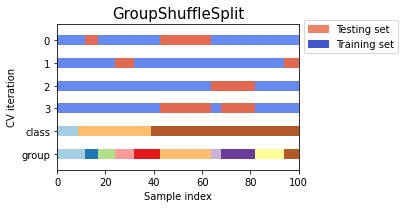

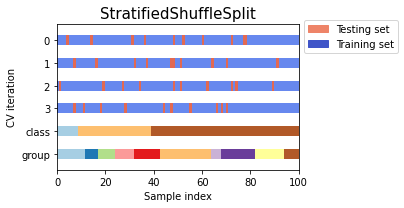

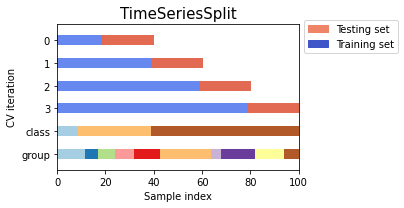

In [124]:
cvs = [
    KFold,
    GroupKFold,
    ShuffleSplit,
    StratifiedKFold,
    StratifiedGroupKFold,
    GroupShuffleSplit,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
plt.show()

## Time series

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [125]:
from sklearn.model_selection import TimeSeriesSplit

In [126]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

In [127]:
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [128]:
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0]
  Test:  index=[1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2]
Fold 2:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 3:
  Train: index=[0 1 2 3]
  Test:  index=[4]
Fold 4:
  Train: index=[0 1 2 3 4]
  Test:  index=[5]


In [129]:
# Fix test_size to 2 with 12 samples
X = np.random.randn(12, 2)
y = np.random.randint(0, 2, 12)
tscv = TimeSeriesSplit(n_splits=3, test_size=2)
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[6 7]
Fold 1:
  Train: index=[0 1 2 3 4 5 6 7]
  Test:  index=[8 9]
Fold 2:
  Train: index=[0 1 2 3 4 5 6 7 8 9]
  Test:  index=[10 11]


In [130]:
# Add in a 2 period gap
tscv = TimeSeriesSplit(n_splits=3, test_size=2, gap=2)
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[0 1 2 3]
  Test:  index=[6 7]
Fold 1:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[8 9]
Fold 2:
  Train: index=[0 1 2 3 4 5 6 7]
  Test:  index=[10 11]


## Data augmentation

When class imbalance is important one may be forced to do data augmentation: use data from the minority classes to create synthetic data sets based on transformation of known examples. 

You should NOT use synthetic data in the test set created in this way, since this clearly introduces data leakage problems.

In [131]:
stars = pd.read_csv("data/SDSS_stars.csv")
stars.head()

,u_mag,g_mag,r_mag,i_mag,z_mag,ra,dec
0,20.533161,17.968031,16.827314,16.373095,16.091063,190.001261,21.910620
1,18.894476,17.674576,17.208895,17.033516,16.972940,190.002330,21.874641
2,18.290901,17.022612,16.625498,16.431305,16.399673,190.012240,21.702999
3,19.784182,17.820679,17.003235,16.721306,16.541569,190.012912,23.667913
4,18.874607,17.638632,17.120625,16.907972,16.849592,190.012951,24.797507


In [132]:
QSOs = pd.read_csv("data/SDSS_QSO.dat", sep = "\s+", index_col = "SDSS")
QSOs.head()

,z,u_mag,sig_u_mag,g_mag,sig_g_mag,r_mag,sig_r_mag,i_mag,sig_i_mag,z_mag,sig_z_mag,FIRST,ROSAT,Mp
SDSS,,,,,,,,,,,,,,
000006.53+003055.2,1.8227,20.389,0.066,20.468,0.034,20.332,0.037,20.099,0.041,20.053,0.121,0.0,-9.0,-25.100
000008.13+001634.6,1.8365,20.233,0.054,20.200,0.024,19.945,0.032,19.491,0.032,19.191,0.068,0.0,-9.0,-25.738
000009.26+151754.5,1.1986,19.921,0.042,19.811,0.036,19.386,0.017,19.165,0.023,19.323,0.069,-1.0,-9.0,-25.085
000009.38+135618.4,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,18.331,0.024,18.110,0.033,-1.0,-9.0,-27.419
000009.42-102751.9,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,18.791,0.018,18.751,0.047,0.0,-9.0,-26.459


In [133]:
stars.shape

(5000, 7)

In [134]:
QSOs.shape

(77429, 14)

In [135]:
stars["cat"] = "star"
stars["u-g"] = stars.u_mag - stars.g_mag
stars["g-r"] = stars.g_mag - stars.r_mag
stars["r-i"] = stars.r_mag - stars.i_mag
stars["i-z"] = stars.i_mag - stars.z_mag
QSOs["cat"] = "QSO"
QSOs["u-g"] = QSOs.u_mag - QSOs.g_mag
QSOs["g-r"] = QSOs.g_mag - QSOs.r_mag
QSOs["r-i"] = QSOs.r_mag - QSOs.i_mag
QSOs["i-z"] = QSOs.i_mag - QSOs.z_mag

In [136]:
sel_cols = ["u-g", "g-r", "r-i", "i-z", "cat"]
data = pd.concat([stars[sel_cols], QSOs[sel_cols]])
data["cat"] = data["cat"].astype("category")
data.sample(10)

,u-g,g-r,r-i,i-z,cat
091438.61+280302.8,-0.068,-0.051,0.385,0.017,QSO
022649.54-001923.0,0.518,0.406,0.308,0.474,QSO
084354.86+222351.8,0.344,0.060,0.197,0.022,QSO
115951.93+022347.4,0.556,0.082,0.091,0.229,QSO
103104.87+355759.5,0.339,0.693,0.146,0.050,QSO
103156.09+134714.7,0.434,0.060,0.123,0.134,QSO
135215.96+495834.4,0.102,-0.025,-0.122,0.068,QSO
132736.59+593926.0,0.087,0.041,0.111,0.049,QSO
100945.47+120927.0,0.521,0.165,-0.050,0.263,QSO
222617.33-002518.5,0.272,0.050,0.221,0.045,QSO


In [137]:
data.groupby("cat").count()

,u-g,g-r,r-i,i-z
cat,,,,
QSO,77429,77429,77429,77429
star,5000,5000,5000,5000


In [145]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [146]:
X_train, X_test, y_train, y_test = train_test_split(data[["u-g", "g-r"]], data.cat, test_size=.4)

In [147]:
le = preprocessing.LabelEncoder()
le.fit(data.cat)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['QSO' 'star']


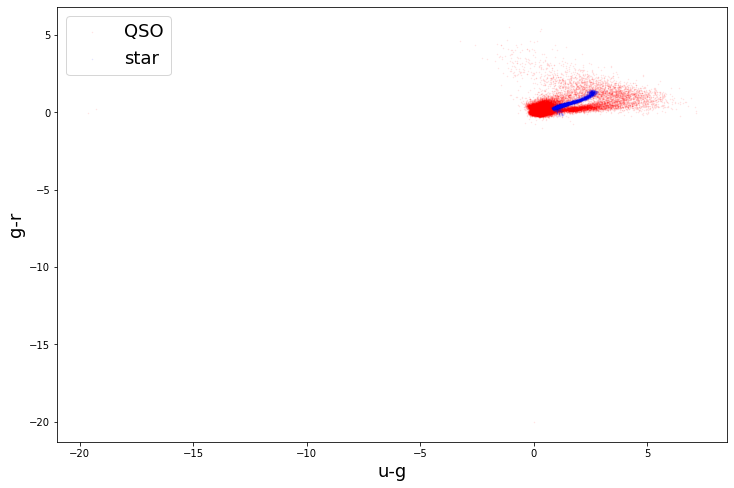

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {"QSO": 'r', "star": 'b'}
for cl in colors.keys():
    ax.scatter(data.loc[data.cat == cl]["u-g"], data.loc[data.cat == cl]["g-r"], marker='.', alpha=0.1, s=1, label=cl, color=colors[cl])
ax.set_xlabel("u-g", fontsize=18)
ax.set_ylabel("g-r", fontsize=18)
ax.legend(fontsize=18)

#### SMOTE: Synthetic Minority Over-sampling Technique

https://jair.org/index.php/jair/article/view/10302/24590

**Abstract**

An approach to the construction of classifiers from imbalanced datasets is described.A dataset is imbalanced if the classification categories are not approximately equally represented.  Often real-world data sets are predominately composed of “normal” examples with only a small percentage of “abnormal” or “interesting” examples. It is also the case that the cost of misclassifying an abnormal (interesting) example as a normal example is often much higher than the cost of the reverse error. Under-sampling of the majority (normal) class has been proposed as a good means of increasing the sensitivity of a classifier to the minority class. This paper shows that a combination of our method of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance (in ROC space) than only under-sampling the majority class. This paper also shows that a combination of our method of over-sampling the minority class and under-sampling the majority class can achieve better classifier performance (in ROC space) than varying the loss ratios in Ripper or class priors in Naive Bayes. Our method of over-sampling the minority class involves creating synthetic minority class examples. Experiments are performed using C4.5, Ripper and a Naive Bayes classifier. The method is evaluated using the area under the Receiver Operating Characteristic curve (AUC) and the ROC convex hull strategy.

https://imbalanced-learn.readthedocs.io/en/stable/install.html

![](images/SMOTE.png)

#### ADASYN

* Adaptively shifts the classification decision boundary toward the difficult examples

Also, ANS, Border SMOTE, Safe Level SMOTE, DBSMOTE, SMOTETomek

In [150]:
from imblearn.over_sampling import SMOTE, ADASYN

In [151]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
#X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

In [152]:
X_resampled

,u-g,g-r
0,0.233000,-0.113000
1,0.133000,-0.016000
2,0.319000,-0.143000
3,0.230000,0.233000
4,2.653000,0.388000
...,...,...
92857,1.111581,0.369396
92858,1.240035,0.552177
92859,1.135095,0.393661
92860,1.506542,0.620126


In [153]:
np.unique(y_resampled, return_counts=True)

(array([0, 1]), array([46431, 46431]))

In [154]:
data_resampled = pd.DataFrame()
data_resampled["u-g"] = X_resampled["u-g"]
data_resampled["g-r"] = X_resampled["g-r"]
data_resampled["cat"] = y_resampled
data_resampled["cat"] = data_resampled["cat"].astype('category')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
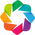

In [158]:
import holoviews as hv
from holoviews.operation.datashader import datashade, dynspread
import datashader as ds
from matplotlib import cm
hv.extension('bokeh')

In [159]:
points = hv.Points(data_resampled, kdims=['u-g', 'g-r'], vdims=['cat'])
datashade.x_range=(data_resampled["u-g"].quantile(0.001),data_resampled["u-g"].quantile(0.995))
datashade.y_range=(data_resampled["g-r"].quantile(0.001),data_resampled["g-r"].quantile(0.995)); 
dynspread(datashade(points, aggregator=ds.count_cat('cat')).opts(width=800, height=500))

:DynamicMap   []
   :RGB   [u-g,g-r]   (R,G,B,A)

In [160]:
def plot_contours_lgm(ax, bst, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = bst.predict(np.c_[xx.ravel(), yy.ravel()]) >= 0.5
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [161]:
import lightgbm as lgb

In [162]:
train_data = lgb.Dataset(X_train, label=y_train)
train_data_resampled = lgb.Dataset(X_resampled, label=y_resampled)

In [163]:
param = param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = 'auc'

In [164]:
num_round = 10
bst = lgb.train(param, train_data, num_round)
bst_resampled = lgb.train(param, train_data_resampled)#, num_round)

[LightGBM] [Info] Number of positive: 3026, number of negative: 46431
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 49457, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061184 -> initscore=-2.730726
[LightGBM] [Info] Start training from score -2.730726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [165]:
lgb.cv(param, train_data, num_round, nfold=5)

[LightGBM] [Info] Number of positive: 2421, number of negative: 37144
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 39565, number of used features: 2
[LightGBM] [Info] Number of positive: 2420, number of negative: 37145
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 39565, number of used features: 2
[LightGBM] [Info] Number of positive: 2421, number of negative: 37145
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [

{'auc-mean': [0.9902893581675155,
  0.9914787194607542,
  0.99244113543358,
  0.9923814994512477,
  0.993331080116096,
  0.993461084092764,
  0.9938448246852104,
  0.9933236071618557,
  0.9940741769950862,
  0.9942701324876552],
 'auc-stdv': [0.0014191885063911999,
  0.0013264173809898973,
  0.001493426364853789,
  0.001316479178475814,
  0.0009550126902938866,
  0.000981545347000621,
  0.0008753302144491069,
  0.0013114219435805153,
  0.0008420242474888435,
  0.0006921727586829342]}

In [166]:
lgb.cv(param, train_data_resampled, num_round, nfold=5)

[LightGBM] [Info] Number of positive: 37145, number of negative: 37144
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 74289, number of used features: 2
[LightGBM] [Info] Number of positive: 37144, number of negative: 37145
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 74289, number of used features: 2
[LightGBM] [Info] Number of positive: 37145, number of negative: 37145
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM

{'auc-mean': [0.986406285577363,
  0.9876575985646576,
  0.987696878076512,
  0.9883425207322023,
  0.9884313883491581,
  0.9888355241013679,
  0.9888706699076983,
  0.9890524240807121,
  0.9895026398204347,
  0.9895651228949314],
 'auc-stdv': [0.00027060108564694546,
  0.001315279453655608,
  0.001270609715053392,
  0.0013206738433525502,
  0.0013010713179024821,
  0.001242301475987004,
  0.0012582939528655416,
  0.001398294279722126,
  0.0005867168402283754,
  0.0006587290489457239]}

In [167]:
y_pred = np.array(bst.predict(X_test) >= 0.5, dtype=int)
y_pred_resampled = np.array(bst_resampled.predict(X_test) >= 0.5, dtype=int)

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay

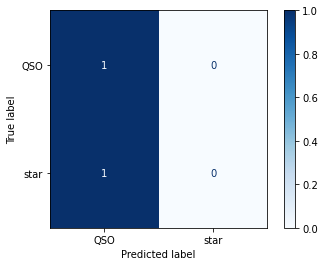

In [172]:
ConfusionMatrixDisplay.from_predictions(le.inverse_transform(y_test), le.inverse_transform(y_pred), cmap=cm.Blues, normalize='true')

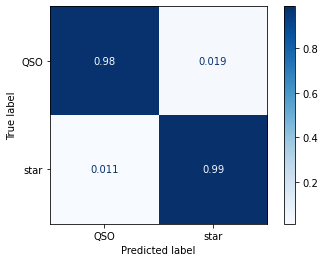

In [173]:
ConfusionMatrixDisplay.from_predictions(le.inverse_transform(y_test), le.inverse_transform(y_pred_resampled), cmap=cm.Blues, normalize='true')

## Models in the real world



Many models that are reported to perform with certain metrics in academic publications do badly in the real world. See https://www.technologyreview.com/2021/07/30/1030329/machine-learning-ai-failed-covid-hospital-diagnosis-pandemic/


A strong assumption is that your test set is representative of the real world data, which many times is not the case. It is very common for labeled data to not be representative of the real world, because labeling is difficult and in the process of selecting data that can be labeled biases are introduced.

This is very hard to solve, but you can do some things to minimize this problem:
1. train with a semisupervised setting, so that your model can see data with the real world data distribution
2. test the unlabeled set using domain knowledge. For example, is the distribution of classes as expected? (some classes are known to be very rare), is the distribution of properties per class distributed as expected (some classes are known to have certain properties that should be satisfied, even better if you didn't use these properties in your model).
3. Look at the data as a function of the variables that may cause a bias when labeling. For example, if your data is based on Twitter (now X) replies, can you get some data from a different source?